In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

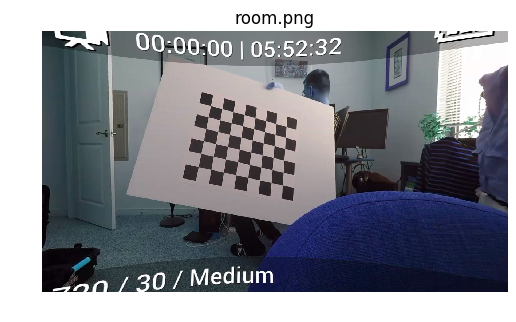

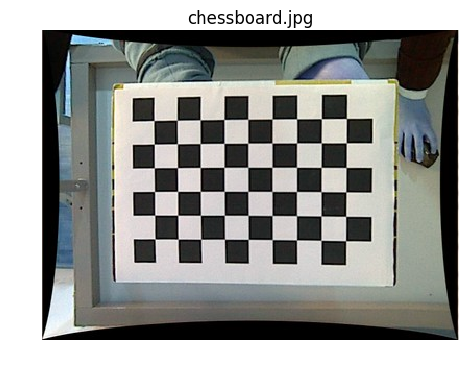

In [2]:
image_filenames = [
    'room.png',
    'chessboard.jpg',
]

def load_images():
    # Read some images
    images = []
    for filename in image_filenames:
        img = cv2.imread(filename)
        images.append(img)
    return images

# plot the raw images
images = load_images()
cols = 2
rows = (len(images) / cols) + 1
for i in range(len(images)):
    plt.title(image_filenames[i])
    plt.imshow(images[i])
    plt.axis('off')
    plt.show()

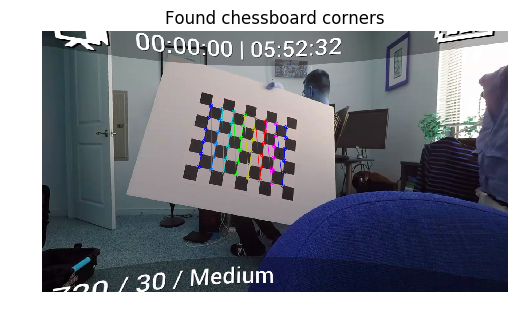

In [8]:
image = images[0]
nx = 6
ny = 8
found, corners = cv2.findChessboardCorners(image, (nx, ny), None, cv2.CALIB_CB_FAST_CHECK)
annotated = image.copy()
if found:
    cv2.drawChessboardCorners(annotated, (nx, ny), corners, found)
    message = "Found chessboard corners"
else:
    message = "No chessboard found"
    
plt.title(message)
plt.imshow(annotated)
plt.axis('off')
plt.show()

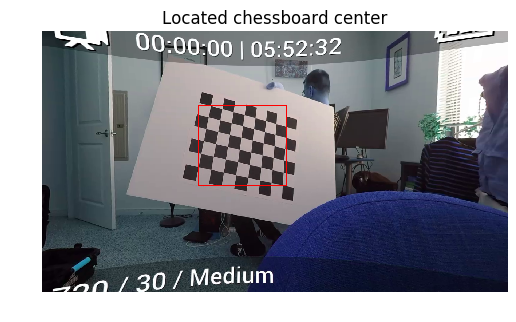

In [10]:
x,y,w,h = cv2.boundingRect(corners)
annotated2 = image.copy()
cv2.rectangle(annotated2,(x,y),(x+w,y+h),(255,0,0),2)
plt.title("Located chessboard center")
plt.imshow(annotated2)
plt.axis('off')
plt.show()